# Home Credit Default Risk
$^1$Nguyễn Quốc Dương, $^2$Đặng Thế Vĩnh Hiển

$^1$Học viên cao học, Khoa học dữ liệu ứng dụng, Đại học Quy Nhơn

$^2$Khoa Toán và Thống kê, Đại học Quy Nhơn

## Dự đoán khả năng trả nợ của mỗi người nộp đơn như thế nào?

## Import necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## Read the data files

In [157]:
train = pd.read_csv("../dataset/application_train.csv")
test = pd.read_csv("../dataset/application_test.csv")

In [146]:
train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,EXT_SOURCE_3 EXT_SOURCE_2^2 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1^2,EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2 DAYS_BIRTH^2,EXT_SOURCE_2^3 DAYS_BIRTH,EXT_SOURCE_2^2 EXT_SOURCE_1 DAYS_BIRTH,DIR,AIR,ACR,DAR
0,100002,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,-91.172960,0.000253,-28.791659,3.280441e+06,-172.008376,-54.318807,2.007889,0.121978,0.060749,0.067329
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,-3474.605044,0.032271,-1738.108981,9.361535e+07,-4039.144848,-2020.509913,4.790750,0.132217,0.027598,0.070862
2,100004,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,-4294.187521,0.103841,-3908.621640,1.471224e+08,-3272.066505,-2978.274675,2.000000,0.100000,0.050000,0.011814
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,-4303.904125,0.089142,-3348.134986,1.257541e+08,-5229.895165,-4068.490949,2.316167,0.219900,0.094941,0.159905
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,-1111.296208,0.044231,-1742.320648,6.863256e+07,-670.042495,-1050.510985,4.222222,0.179963,0.042623,0.152418


In [6]:
train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


<AxesSubplot:xlabel='TARGET', ylabel='count'>

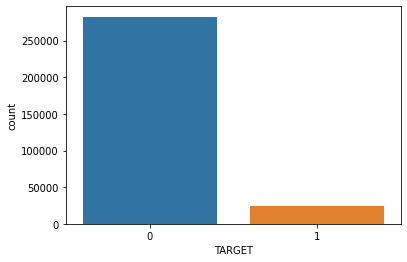

In [7]:
# Target labels
sns.countplot(train.TARGET)

In [8]:
train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

Hiện tượng imbalanced.
target 0: trả khoản vay đúng hạn (91.92%)
target 1: gặp khó khăn khi trả khoản vay (8.08%)

In [9]:
print("The train dataset dimensions are as follows: {}".format(train.shape))
print("The test dataset dimensions are as follows: {}".format(test.shape))

The train dataset dimensions are as follows: (307511, 122)
The test dataset dimensions are as follows: (48744, 121)


In [147]:
print("Train dataset: \n{}".format(train.dtypes.value_counts()))
print()
print("Test dataset: \n{}".format(test.dtypes.value_counts())) 

Train dataset: 
uint8      117
float64     97
int64       39
int32        4
bool         1
dtype: int64

Test dataset: 
uint8      117
float64     97
int64       38
int32        4
bool         1
dtype: int64


In [11]:
# Check missing values
def missing_columns(dataframe):
    """
    Returns a dataframe that contains missing column names and 
    percent of missing values in relation to the whole dataframe.
    
    dataframe: dataframe that gives the column names and their % of missing values
    """
    
    # find the missing values
    missing_values = dataframe.isnull().sum().sort_values(ascending=False)
    
    # percentage of missing values in relation to the overall size
    missing_values_pct = 100 * missing_values/len(dataframe)
    
    # create a new dataframe which is a concatinated version
    concat_values = pd.concat([missing_values, missing_values/len(dataframe),missing_values_pct.round(1)],axis=1)

    # give new col names
    concat_values.columns = ['Missing Count','Missing Count Ratio','Missing Count %']
    
    # return the required values
    return concat_values[concat_values.iloc[:,1]!=0]
    

In [12]:
missing_columns(train)

,Missing Count,Missing Count Ratio,Missing Count %
COMMONAREA_MEDI,214865,0.698723,69.9
COMMONAREA_AVG,214865,0.698723,69.9
COMMONAREA_MODE,214865,0.698723,69.9
NONLIVINGAPARTMENTS_MODE,213514,0.694330,69.4
NONLIVINGAPARTMENTS_AVG,213514,0.694330,69.4
...,...,...,...
EXT_SOURCE_2,660,0.002146,0.2
AMT_GOODS_PRICE,278,0.000904,0.1
AMT_ANNUITY,12,0.000039,0.0
CNT_FAM_MEMBERS,2,0.000007,0.0


In [13]:
missing_columns(test)

,Missing Count,Missing Count Ratio,Missing Count %
COMMONAREA_AVG,33495,0.687161,68.7
COMMONAREA_MODE,33495,0.687161,68.7
COMMONAREA_MEDI,33495,0.687161,68.7
NONLIVINGAPARTMENTS_AVG,33347,0.684125,68.4
NONLIVINGAPARTMENTS_MODE,33347,0.684125,68.4
...,...,...,...
OBS_30_CNT_SOCIAL_CIRCLE,29,0.000595,0.1
OBS_60_CNT_SOCIAL_CIRCLE,29,0.000595,0.1
DEF_60_CNT_SOCIAL_CIRCLE,29,0.000595,0.1
AMT_ANNUITY,24,0.000492,0.0


In [15]:
# Number of unique classes in each object column
train.select_dtypes('object').apply(pd.Series.nunique)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [16]:
test.select_dtypes('object').apply(pd.Series.nunique)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               7
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             5
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

## Handling Categorical variables - Label Encoding and One Hot Encoding.

In [17]:
# Create a label encode object having less than or equal to 2 unique values
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
transform_counter = 0

# iterate through all the categorical columns
for col in train.select_dtypes('object').columns:
    
    # select only those columns where number of unique values in the category is less than or equal to 2 
    if pd.Series.nunique(train[col]) <= 2:
        train[col] = le.fit_transform(train[col].astype(str))
        test[col] = le.fit_transform(test[col].astype(str))
        
        transform_counter+=1
        
print("Label encoded {} columns.".format(transform_counter))    

Label encoded 4 columns.


In [18]:
# one-hot encode of categorical variables
train = pd.get_dummies(train,drop_first=True)
test = pd.get_dummies(test,drop_first=True)

In [19]:
print('Training Features shape: ', train.shape)
print('Testing Features shape: ', test.shape)

Training Features shape:  (307511, 230)
Testing Features shape:  (48744, 226)


In [20]:
# collect the target labels to support the aligning 

target = train['TARGET']

In [21]:
# Ensure train and test have the same number of columns by aligning.
train, test = train.align(test,axis=1,join='inner')

In [22]:
train['TARGET'] = target

In [23]:
print('Training Features shape: ', train.shape)
print('Testing Features shape: ', test.shape)

Training Features shape:  (307511, 227)
Testing Features shape:  (48744, 226)


In [24]:
(train['DAYS_BIRTH']/-365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

Text(0.5, 0, 'Age of the client (Years)')

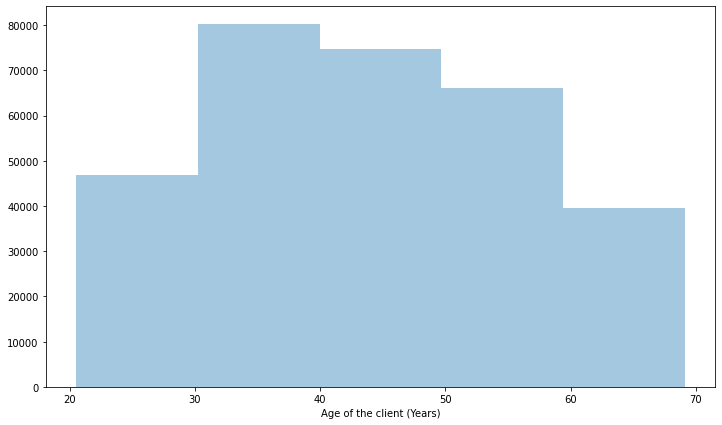

In [25]:
fig, ax = plt.subplots(figsize =(12,7))
sns.distplot(train['DAYS_BIRTH']/-365,bins=5,kde=False)
plt.xlabel("Age of the client (Years)")

In [26]:
(train['DAYS_EMPLOYED']/365).describe()

count    307511.000000
mean        174.835742
std         387.056895
min         -49.073973
25%          -7.561644
50%          -3.323288
75%          -0.791781
max        1000.665753
Name: DAYS_EMPLOYED, dtype: float64

Text(0.5, 0, 'Time before the loan application the persons started current employment(in years)')

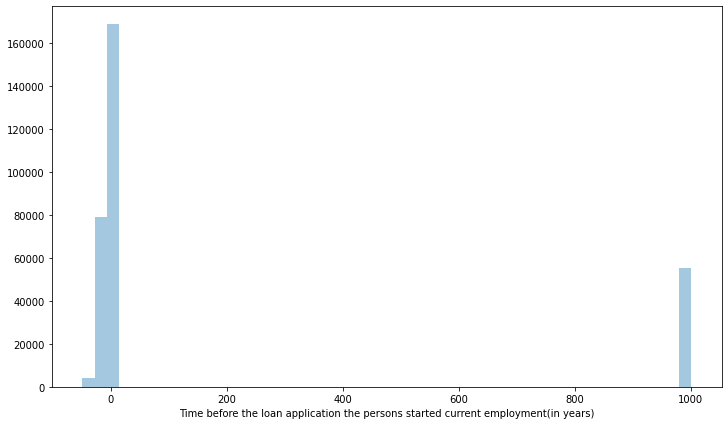

In [27]:
fig, ax = plt.subplots(figsize=(12,7))
sns.distplot(train['DAYS_EMPLOYED']/365,kde=False)
plt.xlabel("Time before the loan application the persons started current employment(in years)")

In [28]:
# find the number of records where DAYS_EMPLOYED is between [900,1100] years. 
thousand_anomalies = train[(train['DAYS_EMPLOYED']/365>=900) & (train['DAYS_EMPLOYED']/365<=1100)]
len(thousand_anomalies)

55374

<AxesSubplot:xlabel='TARGET', ylabel='count'>

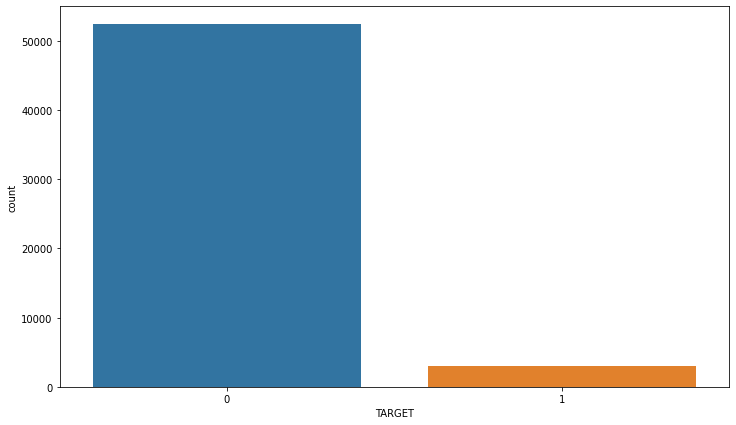

In [29]:
fig, ax = plt.subplots(figsize=(12,7))
sns.countplot(x='TARGET',data=thousand_anomalies)

In [30]:
# get the index of anomalies and non anomalies
anomalies_index = pd.Index(thousand_anomalies.index)
non_anomalies_index = train.index.difference(anomalies_index)

In [31]:
# get the anomalies records
non_anomalies = train.iloc[non_anomalies_index]

In [32]:
# get the anomaly targets
anomalies_target = thousand_anomalies['TARGET'].value_counts()
non_anomalies_target = non_anomalies['TARGET'].value_counts()

In [33]:
# find the default rate for anomalies and non anomalies

print("Anomalies have a default rate of {}%".format(100*anomalies_target[1]/(anomalies_target[1]+anomalies_target[0])))
print("Non Anomalies have a default rate of {}%".format(100*non_anomalies_target[1]/(non_anomalies_target[1]+non_anomalies_target[0])))

Anomalies have a default rate of 5.399646043269405%
Non Anomalies have a default rate of 8.659974537652149%


In [34]:
# Create an anomalous flag column
train['DAYS_EMPLOYED_ANOM'] = train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
train['DAYS_EMPLOYED'] = train['DAYS_EMPLOYED'].replace({365243: np.nan})

Text(0.5, 0, 'Years worked before application')

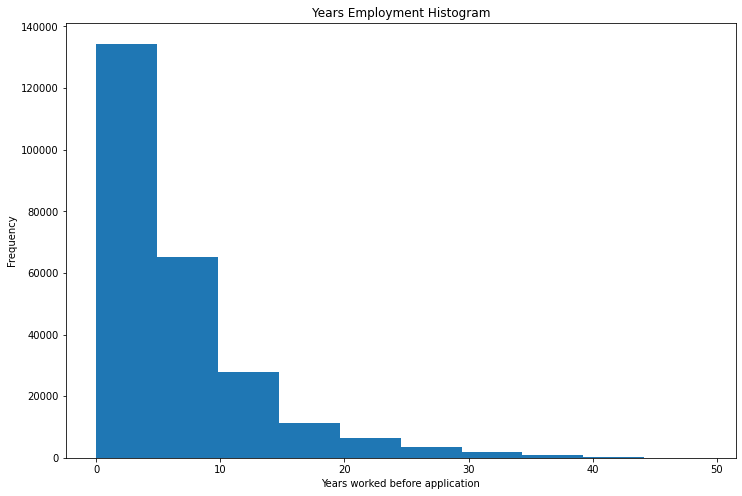

In [35]:
# Looking at the years employed for anomalies

plt.figure(figsize=(12,8))
(train['DAYS_EMPLOYED']/-365).plot.hist(title = 'Years Employment Histogram')
plt.xlabel("Years worked before application")

In [36]:
# Create an anomalous flag column
test['DAYS_EMPLOYED_ANOM'] = test["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
test['DAYS_EMPLOYED'] = test['DAYS_EMPLOYED'].replace({365243: np.nan})

In [37]:
# Finding out the most correlated features for the TARGET variable. 
corr_train = train.corr()['TARGET']

In [38]:
# Looking at the top 10 most positively and negatively correlated features we get:
print(corr_train.sort_values().tail(10))
corr_train.sort_values().head(10)

REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
CODE_GENDER_M                  0.054713
DAYS_LAST_PHONE_CHANGE         0.055218
NAME_INCOME_TYPE_Working       0.057481
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64


EXT_SOURCE_3                           -0.178919
EXT_SOURCE_2                           -0.160472
EXT_SOURCE_1                           -0.155317
NAME_EDUCATION_TYPE_Higher education   -0.056593
NAME_INCOME_TYPE_Pensioner             -0.046209
DAYS_EMPLOYED_ANOM                     -0.045987
ORGANIZATION_TYPE_XNA                  -0.045987
FLOORSMAX_AVG                          -0.044003
FLOORSMAX_MEDI                         -0.043768
FLOORSMAX_MODE                         -0.043226
Name: TARGET, dtype: float64

## Initially filling up the missing values for the most correlated variables.

In [39]:
from sklearn.impute import SimpleImputer

In [40]:
poly_fitting_vars = ['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1','DAYS_BIRTH']

In [41]:
imputer = SimpleImputer(missing_values= np.nan, strategy='median')

In [42]:
train[poly_fitting_vars] = imputer.fit_transform(train[poly_fitting_vars])

In [43]:
train[poly_fitting_vars].shape

(307511, 4)

In [44]:
test[poly_fitting_vars] = imputer.transform(test[poly_fitting_vars])

In [45]:
test[poly_fitting_vars].shape

(48744, 4)

In [46]:
from sklearn.preprocessing import PolynomialFeatures

In [47]:
poly_feat = PolynomialFeatures(degree=4)

In [48]:
poly_interaction_train = poly_feat.fit_transform(train[poly_fitting_vars])

In [49]:
poly_interaction_train.shape

(307511, 70)

In [50]:
poly_interaction_test = poly_feat.fit_transform(test[poly_fitting_vars])

In [51]:
poly_interaction_test.shape

(48744, 70)

In [52]:
poly_interaction_train = pd.DataFrame(poly_interaction_train,columns=poly_feat.get_feature_names(poly_fitting_vars))

In [53]:
poly_interaction_train.shape

(307511, 70)

In [54]:
poly_interaction_test =  pd.DataFrame(poly_interaction_test,columns=poly_feat.get_feature_names(poly_fitting_vars))

In [55]:
poly_interaction_test.shape

(48744, 70)

## Add the 'TARGET' column which is later used for looking up correlations with the interaction variables.

In [56]:
poly_interaction_train['TARGET'] = train['TARGET']

In [57]:
interaction = poly_interaction_train.corr()['TARGET'].sort_values()

## Which are the most correlated interaction variables?

In [58]:
# looking at the top 15 most positive and negative correlated interaction variables.
print(interaction.tail(15))
(interaction.head(15))

EXT_SOURCE_2^3 DAYS_BIRTH                            0.140230
EXT_SOURCE_3^2 DAYS_BIRTH                            0.141777
EXT_SOURCE_3^2 EXT_SOURCE_1 DAYS_BIRTH               0.144206
EXT_SOURCE_2^2 DAYS_BIRTH                            0.149313
EXT_SOURCE_2^2 EXT_SOURCE_1 DAYS_BIRTH               0.149813
EXT_SOURCE_3 DAYS_BIRTH                              0.150109
EXT_SOURCE_3 EXT_SOURCE_1 DAYS_BIRTH                 0.151816
EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH                 0.155891
EXT_SOURCE_2 DAYS_BIRTH                              0.156873
EXT_SOURCE_3^2 EXT_SOURCE_2 DAYS_BIRTH               0.164466
EXT_SOURCE_3 EXT_SOURCE_2^2 DAYS_BIRTH               0.168159
EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH    0.174173
EXT_SOURCE_3 EXT_SOURCE_2 DAYS_BIRTH                 0.181283
TARGET                                               1.000000
1                                                         NaN
Name: TARGET, dtype: float64


EXT_SOURCE_3 EXT_SOURCE_2                  -0.193939
EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1     -0.189605
EXT_SOURCE_3 EXT_SOURCE_2^2                -0.176428
EXT_SOURCE_3 EXT_SOURCE_2^2 EXT_SOURCE_1   -0.174534
EXT_SOURCE_3^2 EXT_SOURCE_2                -0.172282
EXT_SOURCE_3^2 EXT_SOURCE_2 EXT_SOURCE_1   -0.170938
EXT_SOURCE_2 EXT_SOURCE_1                  -0.166625
EXT_SOURCE_3 EXT_SOURCE_1                  -0.164065
EXT_SOURCE_3^2 EXT_SOURCE_2^2              -0.162923
EXT_SOURCE_3 EXT_SOURCE_2^3                -0.161994
EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1^2   -0.160677
EXT_SOURCE_2                               -0.160295
EXT_SOURCE_2^2 EXT_SOURCE_1                -0.156867
EXT_SOURCE_3                               -0.155892
EXT_SOURCE_3 EXT_SOURCE_2 DAYS_BIRTH^2     -0.154886
Name: TARGET, dtype: float64

## Get the names of the columns which have the highest correlation - '1' and 'TARGET' can be dropped.

In [59]:
set(interaction.head(15).index).union(interaction.tail(15).index).difference(set({'1','TARGET'}))

{'EXT_SOURCE_2',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_2 EXT_SOURCE_1',
 'EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2 DAYS_BIRTH',
 'EXT_SOURCE_2^2 EXT_SOURCE_1',
 'EXT_SOURCE_2^2 EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^3 DAYS_BIRTH',
 'EXT_SOURCE_3',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'EXT_SOURCE_3 EXT_SOURCE_1',
 'EXT_SOURCE_3 EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_3 EXT_SOURCE_2',
 'EXT_SOURCE_3 EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3 EXT_SOURCE_2 DAYS_BIRTH^2',
 'EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1',
 'EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1^2',
 'EXT_SOURCE_3 EXT_SOURCE_2^2',
 'EXT_SOURCE_3 EXT_SOURCE_2^2 DAYS_BIRTH',
 'EXT_SOURCE_3 EXT_SOURCE_2^2 EXT_SOURCE_1',
 'EXT_SOURCE_3 EXT_SOURCE_2^3',
 'EXT_SOURCE_3^2 DAYS_BIRTH',
 'EXT_SOURCE_3^2 EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_3^2 EXT_SOURCE_2',
 'EXT_SOURCE_3^2 EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2 EXT_SOURCE_2 EXT_SOURCE_1',
 'EXT_SOURCE_3^2 EXT_SOURCE_2^2'

## Choose the selected columns which have highest correlation to 'TARGET'. Columns '1' and 'TARGET' are not necessary!

In [60]:
selected_inter_variables = list(set(interaction.head(15).index).union(interaction.tail(15).index).difference(set({'1','TARGET'})))

In [61]:
# look at the selected features
poly_interaction_train[selected_inter_variables].head()

,EXT_SOURCE_2^3 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1,EXT_SOURCE_3^2 EXT_SOURCE_2 EXT_SOURCE_1,EXT_SOURCE_3^2 EXT_SOURCE_2 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2,EXT_SOURCE_2 DAYS_BIRTH,EXT_SOURCE_3^2 EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2 DAYS_BIRTH^2,EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1^2,...,EXT_SOURCE_2,EXT_SOURCE_3 EXT_SOURCE_1,EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_2^2 EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2^2 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2^2,EXT_SOURCE_3 EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_3^2 EXT_SOURCE_2^2,EXT_SOURCE_3^2 EXT_SOURCE_2
0,-172.008376,-28.791659,0.003043,0.000424,-48.326185,0.036649,-2487.756636,-15.261005,3.280441e+06,0.000253,...,0.262949,0.011573,-206.575767,-54.318807,-91.172960,-346.733022,0.009637,-109.495390,0.001343,0.005108
1,-4039.144848,-1738.108981,0.103675,0.055495,-2988.969365,0.333073,-10431.950422,-1495.178425,9.361535e+07,0.032271,...,0.622246,0.166614,-3247.125160,-2020.509913,-3474.605044,-5583.975307,0.207254,-2793.283699,0.110938,0.178286
2,-3272.066505,-3908.621640,0.205220,0.149722,-5635.596478,0.405575,-10587.901540,-5129.588365,1.471224e+08,0.103841,...,0.555912,0.369159,-5357.456268,-2978.274675,-4294.187521,-7724.580288,0.225464,-7031.006802,0.164491,0.295894
3,-5229.895165,-3348.134986,0.176171,0.094300,-3541.866544,0.348166,-12361.644326,-2755.323295,1.257541e+08,0.089142,...,0.650442,0.270849,-6254.966447,-4068.490949,-4303.904125,-6616.894625,0.226462,-5147.479068,0.121220,0.186365
4,-670.042495,-1742.320648,0.087413,0.046790,-1843.135727,0.172754,-6432.819536,-2889.718701,6.863256e+07,0.044231,...,0.322738,0.270849,-3254.993372,-1050.510985,-1111.296208,-3443.335521,0.055754,-5398.555790,0.029844,0.092471


In [62]:
poly_interaction_test[selected_inter_variables].head()

,EXT_SOURCE_2^3 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1,EXT_SOURCE_3^2 EXT_SOURCE_2 EXT_SOURCE_1,EXT_SOURCE_3^2 EXT_SOURCE_2 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2,EXT_SOURCE_2 DAYS_BIRTH,EXT_SOURCE_3^2 EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2 DAYS_BIRTH^2,EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1^2,...,EXT_SOURCE_2,EXT_SOURCE_3 EXT_SOURCE_1,EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_2^2 EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2^2 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2^2,EXT_SOURCE_3 EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_3^2 EXT_SOURCE_2^2,EXT_SOURCE_3^2 EXT_SOURCE_2
0,-9474.116872,-1824.110478,0.094803,0.015123,-386.627243,0.125965,-15193.739370,-368.491942,4.663438e+07,0.071350,...,0.789654,0.120057,-11435.028416,-9029.719944,-1913.883926,-2423.698322,0.099469,-2310.011305,0.015867,0.020094
1,-448.151217,-1288.767295,0.071345,0.030889,-987.604448,0.126276,-5268.465530,-1913.170762,4.120477e+07,0.040309,...,0.291656,0.244619,-2976.631403,-868.151015,-665.278990,-2281.043619,0.036829,-4418.799416,0.015946,0.054673
2,-6866.756812,-4335.147954,0.216346,0.132186,-5234.681105,0.427564,-14022.328504,-3785.063810,1.716760e+08,0.109471,...,0.699787,0.309160,-7095.269204,-4965.175946,-5995.438444,-8567.521115,0.299203,-6194.955045,0.182811,0.261238
3,-1850.411012,-2294.536289,0.164177,0.100592,-2674.113111,0.312281,-7123.246872,-2758.358532,6.099746e+07,0.086313,...,0.509677,0.322119,-3744.932912,-1908.706472,-2224.456866,-4364.443591,0.159163,-4501.941285,0.097520,0.191336
4,-1005.888062,-600.633070,0.046061,0.024655,-1590.465410,0.227860,-5550.962315,-755.260075,3.874573e+07,0.009311,...,0.425687,0.108203,-1122.099233,-477.663386,-1264.843931,-2971.298294,0.096997,-1410.972511,0.051920,0.121968


## Get a list of unselected columns that are to be dropped.

In [63]:
unselected_cols = [element for element in poly_interaction_train.columns if element not in selected_inter_variables]

##  Drop the unselected columns of the interaction dataframes - train and test versions both.

In [64]:
poly_interaction_train = poly_interaction_train.drop(unselected_cols,axis=1)

In [65]:
poly_interaction_test = poly_interaction_test.drop(list(set(unselected_cols).difference({'TARGET'})),axis=1)

#### Dropping columns 'EXT_SOURCE_2' and 'EXT_SOURCE_3' since they're already present in the source dataset.

In [66]:
train = train.join(poly_interaction_train.drop(['EXT_SOURCE_2', 'EXT_SOURCE_3'],axis=1))

In [67]:
test = test.join(poly_interaction_test.drop(['EXT_SOURCE_2', 'EXT_SOURCE_3'],axis=1))

In [68]:
print("The train dataset dimensions are as follows: {}".format(train.shape))
print("The test dataset dimensions are as follows: {}".format(test.shape))

The train dataset dimensions are as follows: (307511, 254)
The test dataset dimensions are as follows: (48744, 253)


# Feature Engineering

In [69]:
train['DIR'] = train['AMT_CREDIT']/train['AMT_INCOME_TOTAL']
train['AIR'] = train['AMT_ANNUITY']/train['AMT_INCOME_TOTAL']
train['ACR'] = train['AMT_ANNUITY']/train['AMT_CREDIT']
train['DAR'] = train['DAYS_EMPLOYED']/train['DAYS_BIRTH']

In [70]:
test['DIR'] = test['AMT_CREDIT']/test['AMT_INCOME_TOTAL']
test['AIR'] = test['AMT_ANNUITY']/test['AMT_INCOME_TOTAL']
test['ACR'] = test['AMT_ANNUITY']/test['AMT_CREDIT']
test['DAR'] = test['DAYS_EMPLOYED']/test['DAYS_BIRTH']

In [71]:
corr_vals = train.corr()['TARGET']

In [72]:
corr_vals.tail(4)

DIR   -0.007727
AIR    0.014265
ACR    0.012704
DAR   -0.067955
Name: TARGET, dtype: float64

## Feature Imputing

In [73]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

In [74]:
features = list(set(train.columns).difference({'TARGET'}))

In [75]:
imputer = SimpleImputer(strategy="median")

## Feature Scaling

In [76]:
scaler = MinMaxScaler(feature_range = (0, 1))

In [77]:
imputer.fit(train.drop(['TARGET'],axis=1))

SimpleImputer(strategy='median')

In [78]:
train_transformed = imputer.transform(train.drop(['TARGET'],axis=1))

In [79]:
test_transformed = imputer.transform(test)

In [80]:
train_transformed = scaler.fit_transform(train_transformed)

In [81]:
test_transformed = scaler.transform(test_transformed)

In [82]:
print("The train dataset dimensions are as follows: {}".format(train_transformed.shape))
print("The test dataset dimensions are as follows: {}".format(test_transformed.shape))

The train dataset dimensions are as follows: (307511, 257)
The test dataset dimensions are as follows: (48744, 257)


# Split the dataset into training set and validation set

In [83]:
from sklearn.model_selection import train_test_split

X_training_set, X_validation_set, y_training_set, y_validation_set = train_test_split(train_transformed, 
                                                                                      target, test_size=0.33, random_state=42)

## Use the Model

### 1. Logistic Regression

In [84]:
# Starting with Logistic Regression.

from sklearn.linear_model import LogisticRegression

logistic_regressor = LogisticRegression(C = 2)

In [85]:
logistic_regressor.fit(X_training_set,y_training_set)

LogisticRegression(C=2)

In [86]:
log_regression_pred = logistic_regressor.predict(X_validation_set)

In [87]:
pd.DataFrame({'target':log_regression_pred})['target'].value_counts()

0    101337
1       142
Name: target, dtype: int64

In [88]:
from sklearn.metrics import accuracy_score,classification_report, roc_auc_score
print("The accuracy in general is : ", accuracy_score(y_validation_set,log_regression_pred))
print("\n")
print("The classification report is as follows:\n", classification_report(y_validation_set,log_regression_pred))
print("ROC AUC score is: ",roc_auc_score(y_validation_set,log_regression_pred))

The accuracy in general is :  0.919953882083978


The classification report is as follows:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     93362
           1       0.48      0.01      0.02      8117

    accuracy                           0.92    101479
   macro avg       0.70      0.50      0.49    101479
weighted avg       0.89      0.92      0.88    101479

ROC AUC score is:  0.5037924328335378


### 2. Random Forest - Bagging ensemble of Decision trees

In [94]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators = 500, random_state = 50, verbose = 1, n_jobs = -1)

In [95]:
random_forest.fit(X_training_set,y_training_set)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  5.6min finished


RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=50, verbose=1)

In [96]:
random_forest_pred = random_forest.predict(X_validation_set)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    4.4s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:   10.2s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:   11.7s finished


In [97]:
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score
print("The accuracy in general is : ", accuracy_score(y_validation_set,random_forest_pred))
print("\n")
print("The classification report is as follows:\n", classification_report(y_validation_set,random_forest_pred))
print("ROC AUC score is: ",roc_auc_score(y_validation_set,random_forest_pred))

The accuracy in general is :  0.9199637363395382


The classification report is as follows:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     93362
           1       0.49      0.01      0.02      8117

    accuracy                           0.92    101479
   macro avg       0.70      0.50      0.49    101479
weighted avg       0.89      0.92      0.88    101479

ROC AUC score is:  0.5045289553267335


### Feature importance of random forest classifier

In [101]:
feature_importance_df = pd.DataFrame({'Feature':features,'Importance':random_forest.feature_importances_})

In [102]:
def plot_importance(df):
    """
    Builds the dataset to plot the feature importance.
    
    """
    # Sort features according to importance
    df = df.sort_values(['Importance'],ascending=False).reset_index()
    
    # drop the old index to avoid confusion
    df = df.drop(['index'],axis=1)
    
    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 9))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:30]))), 
            df['Importance'].head(30), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:30]))))
    ax.set_yticklabels(df['Feature'].head(30))
    
    plt.xlabel("Normalized feature importance")
    plt.ylabel("Features")
    
    plt.show()
    return df

##  The top 10 of the feature importance plot.

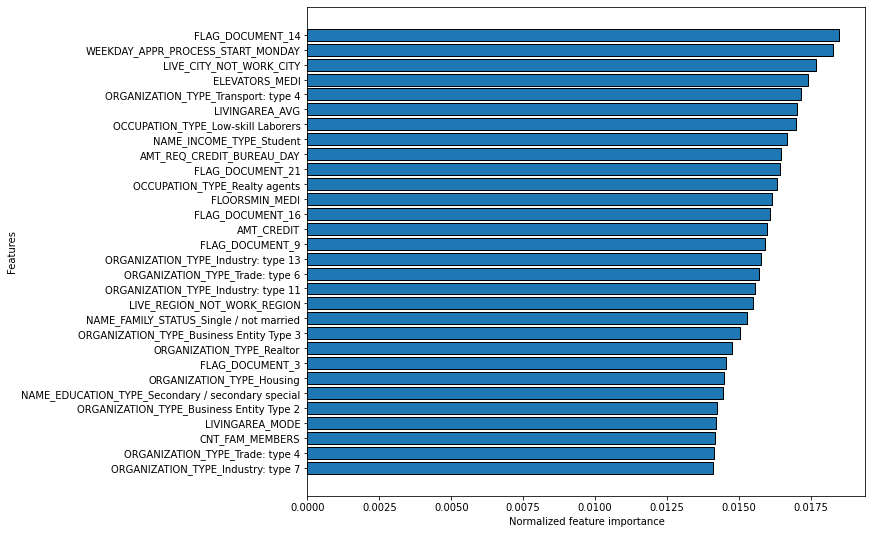

In [103]:
sorted_importance = plot_importance(feature_importance_df)

In [104]:
sorted_importance.head(20)

,Feature,Importance
0,FLAG_DOCUMENT_14,0.018486
1,WEEKDAY_APPR_PROCESS_START_MONDAY,0.018285
2,LIVE_CITY_NOT_WORK_CITY,0.017693
3,ELEVATORS_MEDI,0.017422
4,ORGANIZATION_TYPE_Transport: type 4,0.017168
5,LIVINGAREA_AVG,0.017014
6,OCCUPATION_TYPE_Low-skill Laborers,0.017010
7,NAME_INCOME_TYPE_Student,0.016698
8,AMT_REQ_CREDIT_BUREAU_DAY,0.016456
9,FLAG_DOCUMENT_21,0.016447


## 3. Extreme Gradient Boost Model

In [108]:
from xgboost import XGBClassifier

In [109]:
xgb_classifier = XGBClassifier(n_estimators=250,max_depth=5)

In [110]:
xgb_classifier.fit(X_training_set,y_training_set)

[21:09:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=250, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [111]:
xgb_pred = xgb_classifier.predict(X_validation_set)

In [112]:
pd.DataFrame({'target':xgb_pred})['target'].value_counts()

0    100776
1       703
Name: target, dtype: int64

In [113]:
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score
print("The accuracy in general is : ", accuracy_score(y_validation_set,xgb_pred))
print("\n")
print("The classification report is as follows:\n", classification_report(y_validation_set,xgb_pred))
print("ROC AUC score is: ",roc_auc_score(y_validation_set,xgb_pred))

The accuracy in general is :  0.9193527724948019


The classification report is as follows:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     93362
           1       0.45      0.04      0.07      8117

    accuracy                           0.92    101479
   macro avg       0.69      0.52      0.51    101479
weighted avg       0.88      0.92      0.89    101479

ROC AUC score is:  0.5175266512129749


## XGBoost Feature Importance

In [117]:
xgb_feature_importance_df = pd.DataFrame({'Feature':features,'Importance':xgb_classifier.feature_importances_})

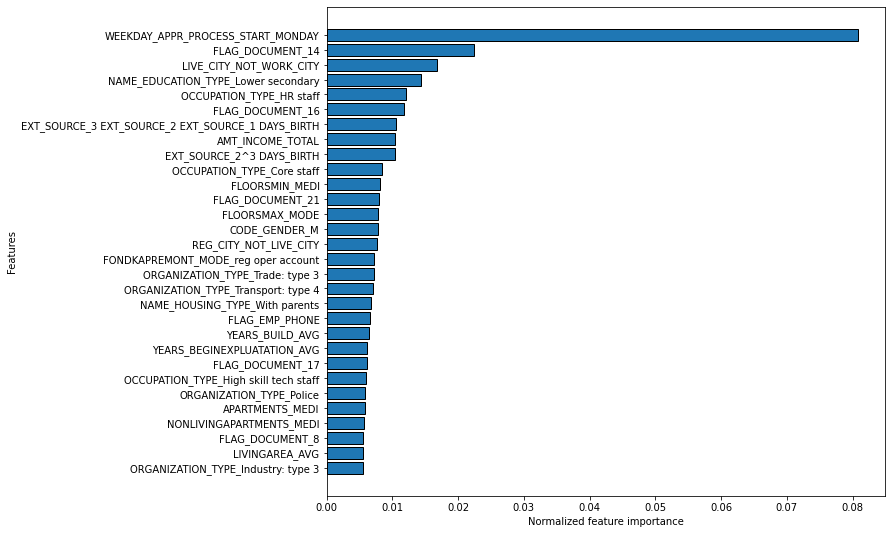

In [118]:
sorted_importance = plot_importance(xgb_feature_importance_df)

In [120]:
sorted_importance.head(20)

,Feature,Importance
0,WEEKDAY_APPR_PROCESS_START_MONDAY,0.080811
1,FLAG_DOCUMENT_14,0.022485
2,LIVE_CITY_NOT_WORK_CITY,0.016735
3,NAME_EDUCATION_TYPE_Lower secondary,0.014412
4,OCCUPATION_TYPE_HR staff,0.012077
5,FLAG_DOCUMENT_16,0.011789
6,EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH,0.010489
7,AMT_INCOME_TOTAL,0.010425
8,EXT_SOURCE_2^3 DAYS_BIRTH,0.010366
9,OCCUPATION_TYPE_Core staff,0.008467


## 4. LightGBM

In [122]:
import lightgbm as lgb

In [123]:
lgb_classifier = lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.1, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
        n_jobs=-1, num_leaves=40, objective=None, random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0)

In [124]:
lgb_classifier.fit(X_training_set,y_training_set)

LGBMClassifier(num_leaves=40, silent=True)

In [125]:
lgb_pred = lgb_classifier.predict(X_validation_set)

In [126]:
pd.DataFrame({'target':lgb_pred})['target'].value_counts()

0    101184
1       295
Name: target, dtype: int64

In [127]:
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score
print("The accuracy in general is : ", accuracy_score(y_validation_set,lgb_pred))
print("\n")
print("The classification report is as follows:\n", classification_report(y_validation_set,lgb_pred))
print("ROC AUC score is: ",roc_auc_score(y_validation_set,lgb_pred))

The accuracy in general is :  0.9202790725174667


The classification report is as follows:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     93362
           1       0.55      0.02      0.04      8117

    accuracy                           0.92    101479
   macro avg       0.73      0.51      0.50    101479
weighted avg       0.89      0.92      0.88    101479

ROC AUC score is:  0.5091998204627537


In [128]:
lgb_feature_importance_df = pd.DataFrame({'Feature':features,'Importance':lgb_classifier.feature_importances_/np.sum(lgb_classifier.feature_importances_)})

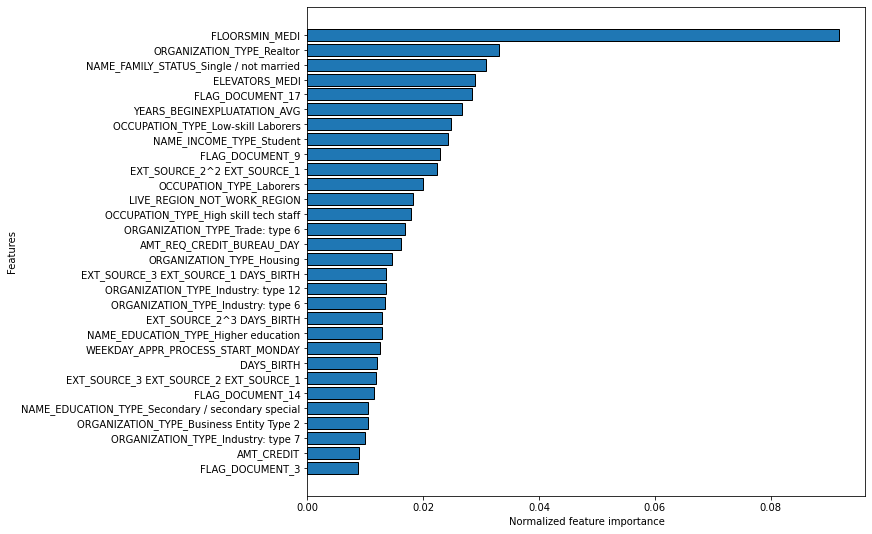

In [129]:
sorted_importance = plot_importance(lgb_feature_importance_df)

# What are the top 20 features?

In [148]:
sorted_importance.head(20)

,Feature,Importance
0,FLOORSMIN_MEDI,0.091795
1,ORGANIZATION_TYPE_Realtor,0.033077
2,NAME_FAMILY_STATUS_Single / not married,0.030769
3,ELEVATORS_MEDI,0.028974
4,FLAG_DOCUMENT_17,0.028462
5,YEARS_BEGINEXPLUATATION_AVG,0.026667
6,OCCUPATION_TYPE_Low-skill Laborers,0.024872
7,NAME_INCOME_TYPE_Student,0.024359
8,FLAG_DOCUMENT_9,0.022821
9,EXT_SOURCE_2^2 EXT_SOURCE_1,0.022308
